# Toy Example

In [1]:
import sys, os
from pyprojroot import here

# spyder up to find the root
root = here(project_files=[".here"])

# append to path
sys.path.append(str(root))

%load_ext autoreload
%autoreload 2

## Import Packages

In [2]:
import numpy as np

# Data
from survae.data.loaders.image import CIFAR10, MNIST
from torch.utils.data import DataLoader

# PyTorch
import torch
import torch.nn as nn


# Optim
from torch.optim import Adam

# Plot
import matplotlib.pyplot as plt
import corner

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

In [3]:
data = CIFAR10()
train_loader, test_loader = data.get_data_loaders(32)

Files already downloaded and verified


In [4]:
test_x = torch.FloatTensor(data.train.data[:500].transpose(0, 3, 1, 2))

## Model

In [5]:
# np.prod((n_channels, height, width))

In [6]:
# model = Flow(base_dist=StandardNormal((24,8,8)),
#              transforms=[
#                UniformDequantization(num_bits=8),
#                Augment(StandardUniform((3,32,32)), x_size=3),
#                AffineCouplingBijection(net(6)), ActNormBijection2d(6), Conv1x1(6),
#                AffineCouplingBijection(net(6)), ActNormBijection2d(6), Conv1x1(6),
#                AffineCouplingBijection(net(6)), ActNormBijection2d(6), Conv1x1(6),
#                AffineCouplingBijection(net(6)), ActNormBijection2d(6), Conv1x1(6),
#                Squeeze2d(), Slice(StandardNormal((12,16,16)), num_keep=12),
#                AffineCouplingBijection(net(12)), ActNormBijection2d(12), Conv1x1(12),
#                AffineCouplingBijection(net(12)), ActNormBijection2d(12), Conv1x1(12),
#                AffineCouplingBijection(net(12)), ActNormBijection2d(12), Conv1x1(12),
#                AffineCouplingBijection(net(12)), ActNormBijection2d(12), Conv1x1(12),
#                Squeeze2d(), Slice(StandardNormal((24,8,8)), num_keep=24),
#                AffineCouplingBijection(net(24)), ActNormBijection2d(24), Conv1x1(24),
#                AffineCouplingBijection(net(24)), ActNormBijection2d(24), Conv1x1(24),
#                AffineCouplingBijection(net(24)), ActNormBijection2d(24), Conv1x1(24),
#                AffineCouplingBijection(net(24)), ActNormBijection2d(24), Conv1x1(24),
#              ]).to(device)

In [7]:
(np.prod((12,8,8)),)

(768,)

In [8]:
from survae.flows import Flow
from survae.distributions import StandardNormal
from survae.transforms.bijections.elementwise_nonlinear import GaussianMixtureCDF, InverseGaussCDF
from survae.transforms.bijections.conv1x1 import Conv1x1Householder
from survae.transforms.surjections.dequantization_uniform import UniformDequantization
from survae.transforms.bijections.reshape import Reshape
from survae.transforms.bijections.squeeze import Squeeze2d
from survae.transforms.surjections.slice import Slice

n_channels, height, width = 3, 32, 32
total_dims = np.prod((n_channels, height, width))




# transforms
num_mixtures = 8

transforms = [
    UniformDequantization(num_bits=8),
    GaussianMixtureCDF((3, 32, 32), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(3, 3),
    GaussianMixtureCDF((3, 32, 32), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(3, 3),
    GaussianMixtureCDF((3, 32, 32), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(3, 3),
    GaussianMixtureCDF((3, 32, 32), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(3, 3),
    GaussianMixtureCDF((3, 32, 32), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(3, 3),
    GaussianMixtureCDF((3, 32, 32), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(3, 3),
    GaussianMixtureCDF((3, 32, 32), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(3, 3),
    # (3,32,32) -> (12,16,16)
    Squeeze2d(), 
    # (12,16,16) -> (6,16,16)
    Slice(StandardNormal((6,16,16)), num_keep=6),
    GaussianMixtureCDF((6,16,16), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(6, 6),
    GaussianMixtureCDF((6,16,16), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(6, 6),
    GaussianMixtureCDF((6,16,16), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(6, 6),
    GaussianMixtureCDF((6,16,16), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(6, 6),
    GaussianMixtureCDF((6,16,16), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(6, 6),
    GaussianMixtureCDF((6,16,16), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(6, 6),
    GaussianMixtureCDF((6,16,16), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(6, 6),
    GaussianMixtureCDF((6,16,16), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(6, 6),
    GaussianMixtureCDF((6,16,16), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(6, 6),
    GaussianMixtureCDF((6,16,16), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(6, 6),
    GaussianMixtureCDF((6,16,16), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(6, 6),
    GaussianMixtureCDF((6,16,16), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(6, 6),
    # (6,16,16) -> (24,8,8)
    Squeeze2d(), 
    # (24,8,8) -> (12,8,8)
    Slice(StandardNormal((12,8,8)), num_keep=12),
    GaussianMixtureCDF((12,8,8), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(12, 12),
    GaussianMixtureCDF((12,8,8), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(12, 12),
    GaussianMixtureCDF((12,8,8), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(12, 12),
    GaussianMixtureCDF((12,8,8), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(12, 12),
    GaussianMixtureCDF((12,8,8), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(12, 12),
    GaussianMixtureCDF((12,8,8), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(12, 12),
    GaussianMixtureCDF((12,8,8), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(12, 12),
    GaussianMixtureCDF((12,8,8), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(12, 12),
    GaussianMixtureCDF((12,8,8), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(12, 12),
    GaussianMixtureCDF((12,8,8), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(12, 12),
    # (12,8,8) -> (48,4,4)
    Squeeze2d(), 
    # (48,4,4) -> (24,4,4)
    Slice(StandardNormal((24,4,4)), num_keep=24),
    GaussianMixtureCDF((24,4,4), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(24, 12),
    GaussianMixtureCDF((24,4,4), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(24, 12),
    GaussianMixtureCDF((24,4,4), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(24, 12),
    GaussianMixtureCDF((24,4,4), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(24, 12),
    GaussianMixtureCDF((24,4,4), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(24, 12),
    GaussianMixtureCDF((24,4,4), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(24, 12),
    GaussianMixtureCDF((24,4,4), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(24, 12),
    GaussianMixtureCDF((24,4,4), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(24, 12),
    GaussianMixtureCDF((24,4,4), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(24, 12),
    GaussianMixtureCDF((24,4,4), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(24, 12),
    # (24,4,4) -> (96,2,2)
    Squeeze2d(), 
    # (96,2,2) -> (48,2,2)
    Slice(StandardNormal((48,2,2)), num_keep=48),
    GaussianMixtureCDF((48,2,2), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(48, 12),
    GaussianMixtureCDF((48,2,2), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(48, 12),
    GaussianMixtureCDF((48,2,2), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(48, 12),
    GaussianMixtureCDF((48,2,2), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(48, 12),
    GaussianMixtureCDF((48,2,2), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(48, 12),
    GaussianMixtureCDF((48,2,2), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(48, 12),
    GaussianMixtureCDF((48,2,2), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(48, 12),
    GaussianMixtureCDF((48,2,2), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(48, 12),
    GaussianMixtureCDF((48,2,2), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(48, 12),
    GaussianMixtureCDF((48,2,2), num_mixtures=num_mixtures), InverseGaussCDF(), Conv1x1Householder(48, 12),
    # (48,2,2) -> (192,)
    Reshape((48,2,2), (np.prod((48,2,2)),))
    
]

# base distribution
base_dist = StandardNormal((np.prod((48,2,2)),))

# flow model
model = Flow(base_dist=base_dist, transforms=transforms)


In [9]:
loss = model.log_prob(test_x)

In [10]:
from torchvision.utils import make_grid
import torch.nn.functional as F
import torchvision.transforms.functional as tv_F
import numpy as np

In [11]:
# def plot_images(data, num_x, num_y):
#     fig, ax = plt.subplots(num_x, num_y)
#     for i, ax in enumerate(ax.flatten()):
#         plottable_image = data[i]

#         if data.ndim == 2:
#             plottable_image = np.reshape(plottable_image, (3, 32, 32))

#         ax.imshow(plottable_image.transpose([1, 2, 0]), cmap="gray")
#         ax.axis("off")
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = tv_F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [12]:
test_x.min(), test_x.max()


(tensor(0.), tensor(255.))

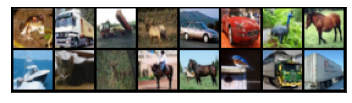

In [13]:
show(make_grid(test_x[:16]/255))

#### Demo: Forward & Inverse

In [14]:
%time
z, ldj = model.forward_transform(test_x)

CPU times: user 43 µs, sys: 9 µs, total: 52 µs
Wall time: 6.68 µs


In [15]:
%time
x_approx = model.inverse_transform(z[:32])

CPU times: user 42 µs, sys: 9 µs, total: 51 µs
Wall time: 5.96 µs


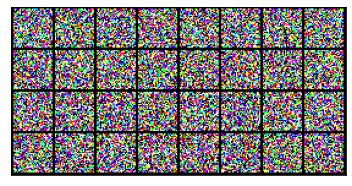

In [16]:
show(make_grid(x_approx[:32]/255))

#### Demo: Latent Space

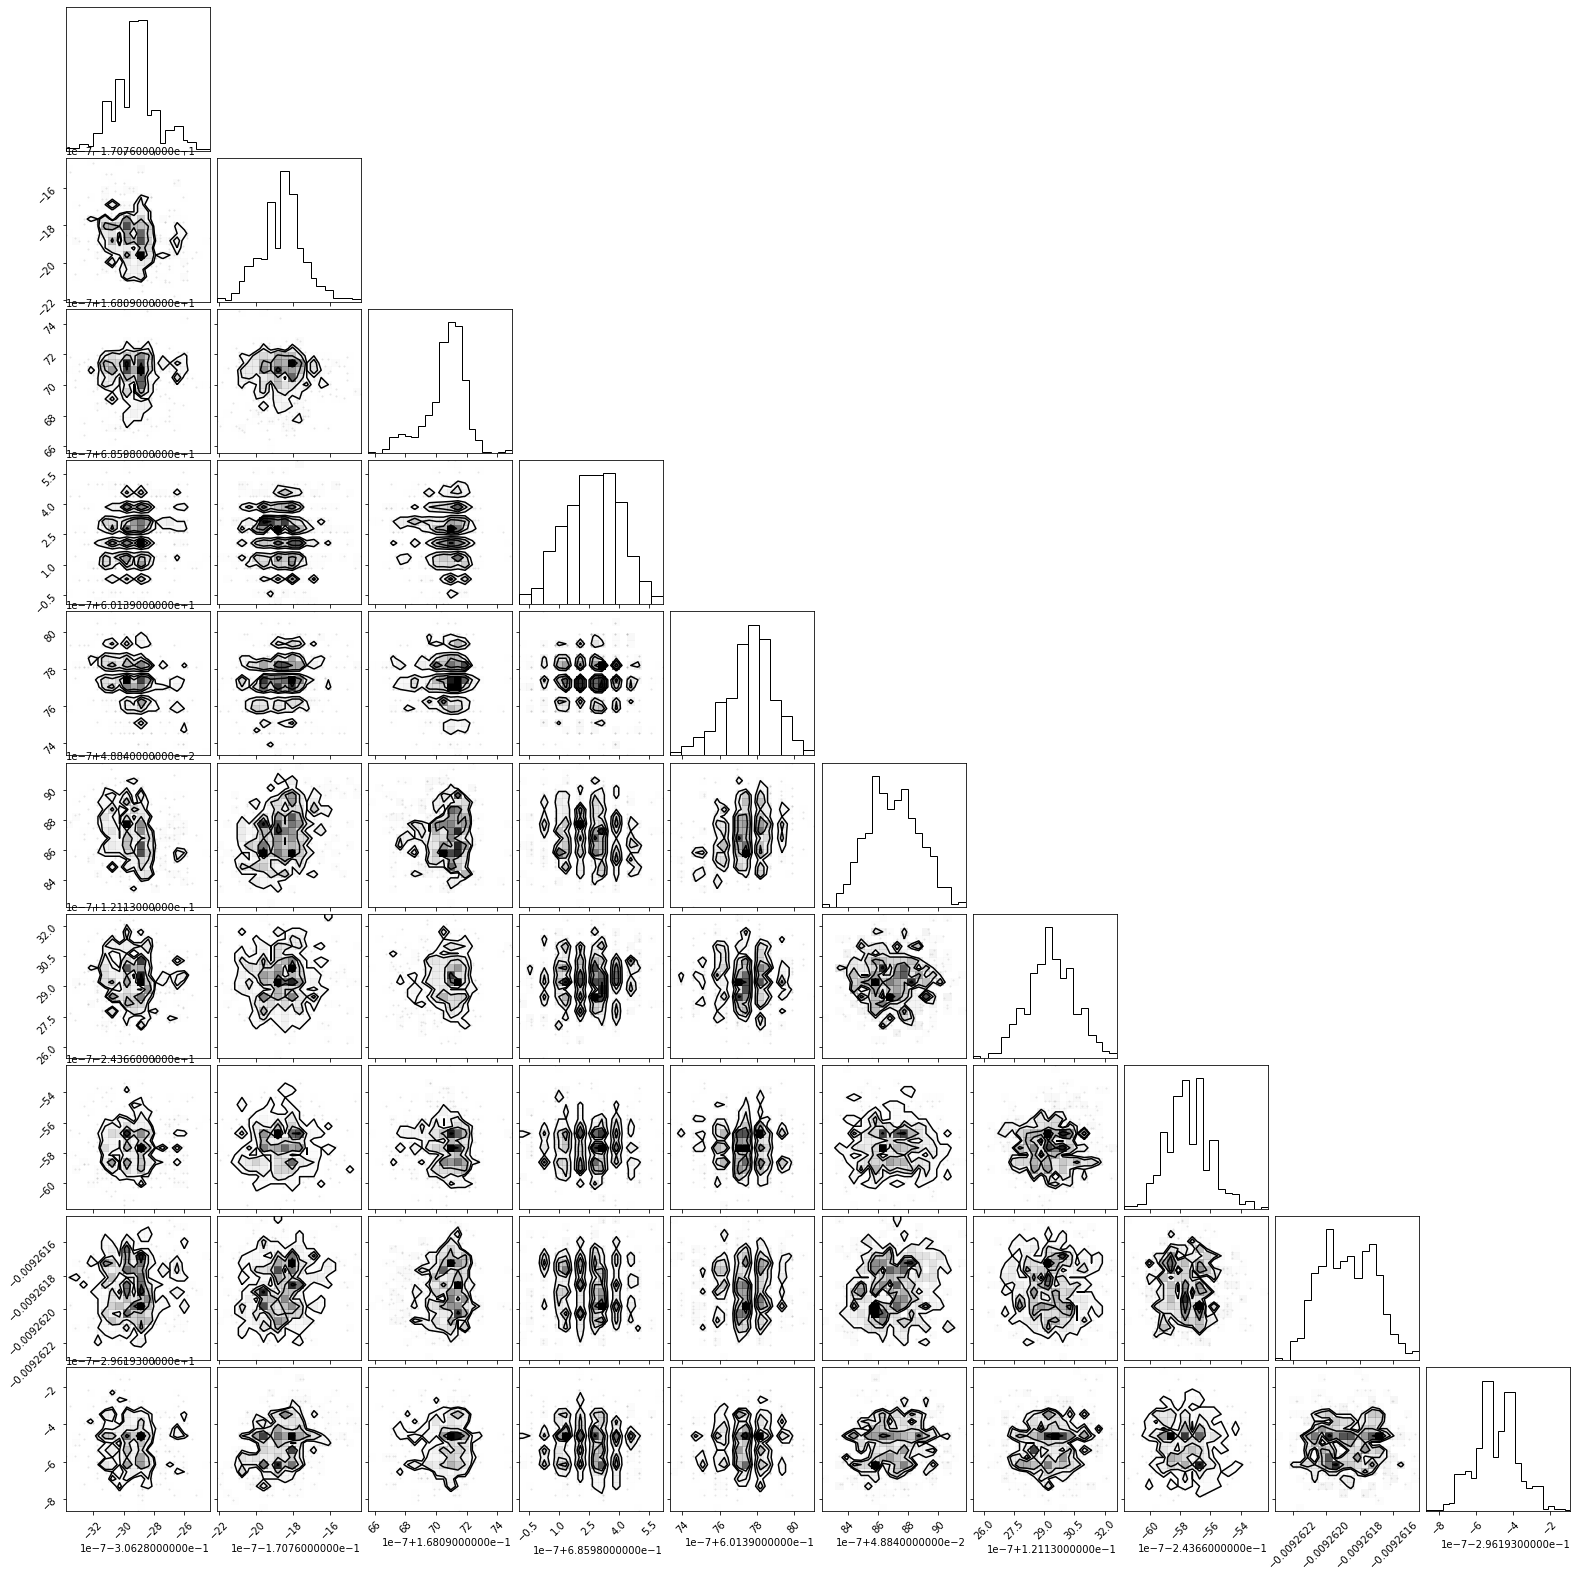

In [17]:
fig = corner.corner(z.detach().numpy()[:, :10])

#### Demo: Samples

In [18]:
%%time
print('Sampling...')
samples = model.sample(64).detach()

Sampling...
CPU times: user 1min 39s, sys: 4.19 s, total: 1min 43s
Wall time: 8.71 s


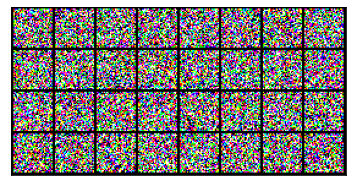

In [19]:
show(make_grid(samples[:32]/255))

In [20]:
# model = Flow(base_dist=StandardNormal((24,8,8)),
#              transforms=[
#                UniformDequantization(num_bits=8),
#                Augment(StandardUniform((3,32,32)), x_size=3),
#                AffineCouplingBijection(net(6)), ActNormBijection2d(6), Conv1x1(6),
#                AffineCouplingBijection(net(6)), ActNormBijection2d(6), Conv1x1(6),
#                AffineCouplingBijection(net(6)), ActNormBijection2d(6), Conv1x1(6),
#                AffineCouplingBijection(net(6)), ActNormBijection2d(6), Conv1x1(6),
#                Squeeze2d(), Slice(StandardNormal((12,16,16)), num_keep=12),
#                AffineCouplingBijection(net(12)), ActNormBijection2d(12), Conv1x1(12),
#                AffineCouplingBijection(net(12)), ActNormBijection2d(12), Conv1x1(12),
#                AffineCouplingBijection(net(12)), ActNormBijection2d(12), Conv1x1(12),
#                AffineCouplingBijection(net(12)), ActNormBijection2d(12), Conv1x1(12),
#                Squeeze2d(), Slice(StandardNormal((24,8,8)), num_keep=24),
#                AffineCouplingBijection(net(24)), ActNormBijection2d(24), Conv1x1(24),
#                AffineCouplingBijection(net(24)), ActNormBijection2d(24), Conv1x1(24),
#                AffineCouplingBijection(net(24)), ActNormBijection2d(24), Conv1x1(24),
#                AffineCouplingBijection(net(24)), ActNormBijection2d(24), Conv1x1(24),
#              ]).to(device)

## Trainer

In [21]:
import pytorch_lightning as pl
import math

class LearnerImage(pl.LightningModule):
    def __init__(self, model:nn.Module):
        super().__init__()
        self.model = model

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        
        # loss function
        loss = -self.model.log_prob(batch).sum() / (math.log(2) * batch.numel())
        
        return {'loss': loss}

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=1e-2)

    def train_dataloader(self):
        return train_loader

In [22]:
# initialize trainer
learn = LearnerImage(model)

In [ ]:
n_epochs = 10

# initialize trainer
trainer = pl.Trainer(min_epochs=1, max_epochs=n_epochs, gpus=1)

# train model
trainer.fit(learn)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type | Params
-------------------------------
0 | model | Flow | 1.3 M 
-------------------------------
1.3 M     Trainable params
0         Non-trainable params
1.3 M     Total params
5.166     Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

## Latent Space

In [ ]:
%time

z_latent, ldj = model.forward_transform(test_x)

In [ ]:
fig = corner.corner(z_latent.detach().numpy()[:, :10])

## Sampling

In [ ]:
%%time
print('Sampling...')
samples = model.sample(64).detach()

In [ ]:
show(make_grid(samples[:32]/255))